In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
iris=datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [11]:
predictors=iris.data[:,0:4]
target=iris.target
predictors=StandardScaler().fit_transform(predictors)
pca=PCA(n_components=2)
princomp=pca.fit_transform(predictors)
princomp_ds=pd.DataFrame(data=princomp,
                          columns=['PC 1','PC 2'])
princomp_ds

,PC 1,PC 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [12]:
target_ds=pd.DataFrame(data=target.reshape(-1,1),columns=['Class'])
data_mod=pd.concat([princomp_ds.reset_index(drop=True),target_ds],axis=1)
data_mod

,PC 1,PC 2,Class
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


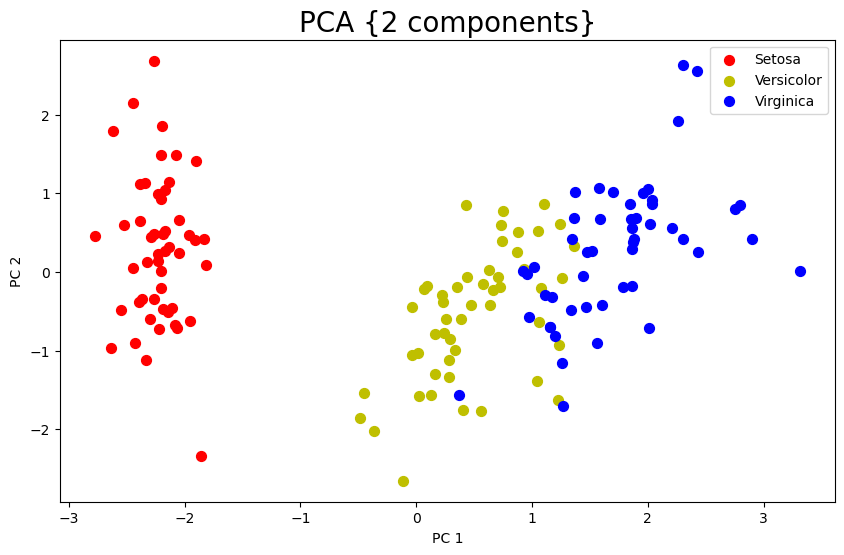

In [24]:
fig=plt.figure(figsize=(10,6))
pca_plot=fig.add_subplot(1,1,1)
pca_plot.set_xlabel('PC 1')
pca_plot.set_ylabel('PC 2')
pca_plot.set_title('PCA {2 components}',fontsize=20)
colors=['r','y','b']
classes=[0,1,2]
labels=['Setosa','Versicolor','Virginica']

for class_value,color,labels in zip(classes,colors,labels):
    indices=data_mod['Class']==class_value
    pca_plot.scatter(data_mod.loc[indices,'PC 1'],
                    data_mod.loc[indices,'PC 2'],
                    c=color,
                    s=50,
                    label=labels)
pca_plot.legend()
plt.show()

In [25]:
from scipy.linalg import svd

iris= datasets.load_iris()
predictors=iris.data[:,0:4]
U,s,VT=svd(predictors)
print(U)

[[-0.06161685  0.12961144  0.0021386  ... -0.09343429 -0.09573864
  -0.08085465]
 [-0.05807094  0.11101978  0.07067239 ...  0.03690405 -0.03153954
   0.01309526]
 [-0.05676305  0.11796647  0.00434255 ...  0.03066199  0.19531473
   0.13569909]
 ...
 [-0.0940593  -0.0498297  -0.04144001 ...  0.98181631 -0.02194514
  -0.00894446]
 [-0.09488961 -0.05610123 -0.21297821 ... -0.02155617  0.94178018
  -0.02971961]
 [-0.08847836 -0.0515697  -0.09575285 ... -0.0086052  -0.03021088
   0.9736599 ]]


In [26]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.utils import column_or_1d
data = pd.read_csv("btissue.csv")
#print(data.tail(35))
X = data.iloc[:,0:9]
y = column_or_1d(data['class'], warn=True) # To generate 1d array, column_or_1d has been used 
clf = LinearDiscriminantAnalysis() 
lda_fit = clf.fit(X, y)
print(lda_fit)
LinearDiscriminantAnalysis(n_components=None, priors=None,
                           shrinkage=None, solver='svd', 
                           store_covariance=False, tol=0.0001)

pred = clf.predict([[1588.000000, 0.085908, -0.086323,
516.943603, 12895.342130, 25.933331, 141.722204, 416.175649,
1452.331924]])

print(pred)

LinearDiscriminantAnalysis()
['con']


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data=pd.read_csv('apndcts.csv')
predictor=data.iloc[:,0:7]
target=data.iloc[:,7]

test=SelectKBest(chi2,k=2)
test=test.fit(predictor,target)
features=test.transform(predictor)

print(predictor.columns)
np.set_printoptions(precision=3)
print(test.scores_)

Index(['At1', ' At2', ' At3', ' At4', ' At5', ' At6', ' At7'], dtype='object')
[1.771 1.627 2.391 1.084 1.673 1.647 2.236]


In [12]:
import pandas as pd
import numpy as np
length = [10,20,12,34,43,20]
breadth = [20,20,10,11,25,16]
price = [3000,5000,4000,1200,3444,3333]

df = pd.DataFrame({"length": length,
                   "breadth": breadth,
                   "price": price})
df["floor_area"] = df["length"] * df["breadth"]
print(df)
print(df.corr())

   length  breadth  price  floor_area
0      10       20   3000         200
1      20       20   5000         400
2      12       10   4000         120
3      34       11   1200         374
4      43       25   3444        1075
5      20       16   3333         320
              length   breadth     price  floor_area
length      1.000000  0.337662 -0.361535    0.872175
breadth     0.337662  1.000000  0.357440    0.708865
price      -0.361535  0.357440  1.000000    0.004923
floor_area  0.872175  0.708865  0.004923    1.000000


In [14]:
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame({
    "gender": ["male","female","male","female","male"],
    "city": ["delhi","mumbai","delhi","chennai","kolkata"],
    "qualification": ["bachelor","master","phd","bachelor","master"]
})

le_gender = LabelEncoder()
le_city = LabelEncoder()
le_qualification = LabelEncoder()

df["gender"] = le_gender.fit_transform(df["gender"])
df["city"] = le_city.fit_transform(df["city"])
df["qualification"] = le_qualification.fit_transform(df["qualification"])

print(df)

   gender  city  qualification
0       1     1              0
1       0     3              1
2       1     1              2
3       0     0              0
4       1     2              1


In [18]:
df = pd.DataFrame({
    "satisfaction": ["excellent","good","average","poor","good","excellent"]
})

order= {
    "poor": 1,
    "average": 2,
    "good": 3,
    "excellent": 4
}

df["satisfy numeric"] = df["satisfaction"].map(order)
print(df)

  satisfaction  satisfy numeric
0    excellent                4
1         good                3
2      average                2
3         poor                1
4         good                3
5    excellent                4


In [20]:
data = pd.DataFrame({
    "Product": ["A","B","C","D","E","F"],
    "Price": [1200000, 2500000, 3500000, 1800000, 5000000, 2700000]
})
data["Category"] = np.where(
    data["Price"] > 3000000, "High",
    np.where(data["Price"] < 2000000, "Low", "Medium")
)
print(data)

  Product    Price Category
0       A  1200000      Low
1       B  2500000   Medium
2       C  3500000     High
3       D  1800000      Low
4       E  5000000     High
5       F  2700000   Medium


,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P,class
0,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334,car
1,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776,car
2,551.879287,0.232478,0.063530,264.804935,11888.391830,44.894903,77.793297,253.785300,656.769449,car
3,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814,car
4,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503,car
...,...,...,...,...,...,...,...,...,...,...
101,2000.000000,0.106989,0.105418,520.222649,40087.920980,77.059161,204.090347,478.517223,2088.648870,adi
102,2600.000000,0.200538,0.208043,1063.441427,174480.476200,164.071543,418.687286,977.552367,2664.583623,adi
103,1600.000000,0.071908,-0.066323,436.943603,12655.342130,28.963331,103.732704,432.129749,1475.371534,adi
104,2300.000000,0.045029,0.136834,185.446044,5086.292497,27.427344,178.691742,49.593290,2480.592151,adi
